In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## *Домашнее задание №2*

### Тестовые функции

In [2]:
def f_rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    return np.array([
        -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2),
        200 * (x[1] - x[0]**2)
    ])

def f_himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    dx = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    dy = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([dx, dy])

def f_mccormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

def grad_mccormick(x):
    dx = np.cos(x[0] + x[1]) + 2 * (x[0] - x[1]) - 1.5
    dy = np.cos(x[0] + x[1]) - 2 * (x[0] - x[1]) + 2.5
    return np.array([dx, dy])


fs = [ ["Розенброка", f_rosenbrock, grad_rosenbrock, np.array([-1.0, 1.0])],
       ["Химмельбау", f_himmelblau, grad_himmelblau, np.array([0.0, 0.0])], 
       ["МакКормика", f_mccormick, grad_mccormick, np.array([0.0, 0.0])] ]

### Метод DFP

In [3]:
def dfp(f, grad_f, x0, eps=1e-5, max_iter=1000):
    iters = 0
    x = x0.copy()
    n = len(x)
    H = np.eye(n)
    trajectory = [x.copy()]

    for _ in range(max_iter):
        g = grad_f(x)
        if np.linalg.norm(g) < eps:
            break
        p = -H @ g
        alpha = line_search(f, grad_f, x, p)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - g

        if np.dot(y, s) > 1e-10:  # условие корректного обновления
            rho = 1.0 / np.dot(y, s)
            Hy = H @ y
            H = H + np.outer(s, s) * rho - np.outer(Hy, Hy) / np.dot(y, Hy)
        else:
            # Пропускаем обновление, чтобы сохранить положительную определенность
            print(f"Пропущено обновление на итерации {iters}: y^T s = {np.dot(y, s)}")

        print(np.linalg.cond(H))
        x = x_new
        trajectory.append(x.copy())
        iters += 1

    return x, np.array(trajectory), iters


def line_search(f, grad_f, x, p, alpha=1.0, rho=0.8, c=1e-4, min_alpha=1e-8):
    """Линия поиска по условию Армихо с защитой от слишком малых шагов"""
    while f(x + alpha * p) > f(x) + c * alpha * np.dot(grad_f(x), p):
        alpha *= rho
        if alpha < min_alpha:
            break
    return alpha


Функция отрисовки

In [4]:
def plot_function_and_trajectory(f, grad_f, x0, bounds, title):
    x_min, traj, _ = dfp(f, grad_f, x0)
    traj = np.array(traj)

    x = np.linspace(bounds[0][0], bounds[0][1], 400)
    y = np.linspace(bounds[1][0], bounds[1][1], 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([f([x, y]) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

    plt.figure(figsize=(6, 5))
    cp = plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.clabel(cp, inline=True, fontsize=8)
    plt.plot(traj[:, 0], traj[:, 1], 'ro-', markersize=4, label='Траектория')
    plt.title(title)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Запуск функций

In [5]:
for title, f, grad_f, x0 in fs:
    x_min, _, iters = dfp(f, grad_f, x0)
    print(f"Минимум функции {title}: {x_min}, f(x) = {f(x_min)}")

26.680552572847176
1027.4171917782264
563.9284629169377
635.6994677486163
364.5017421270261
4575.051986888513
14993.40236754067
16664.86269192736
7100.197957649364
11992.903753790824
14305.873208361378
10556.050207985192
1918.5390216071478
865.2216393888426
2015.7899481937297
3807.3336709863015
3676.128567918338
2512.6304320034064
2146.2393365392477
2489.8693972791634
Минимум функции Розенброка: [0.99999896 0.99999791], f(x) = 1.091903772125552e-12
39.33821774158744
1.9496861032648274
1.9188054685932303
2.4381975952591075
2.443242317632654
2.104239257326094
5.071696162470252
6.287510488093068
3.29105387085958
3.2945575717047078
3.1778655223568477
3.199810026724036
Минимум функции Химмельбау: [2.99999997 1.99999987], f(x) = 4.0219058375080535e-13
4.038006298684535
3.528582811924314
2.951413457704012
2.167697958134733
2.1743771066693958
2.345288147977297
2.3575115791246115
Минимум функции МакКормика: [-0.54719727 -1.54719743], f(x) = -1.913222954980939


In [6]:
for title, f, grad_f, x0 in fs:
    print(f"Функция {title}:")
    for eps in ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5']:
        x_min, _, iters = dfp(f, grad_f, x0, eps=float(eps))
        print(f"Точность: {eps}, количество итераций: {iters}")

Функция Розенброка:
26.680552572847176
1027.4171917782264
563.9284629169377
635.6994677486163
364.5017421270261
4575.051986888513
14993.40236754067
16664.86269192736
7100.197957649364
11992.903753790824
14305.873208361378
10556.050207985192
1918.5390216071478
865.2216393888426
Точность: 1e-1, количество итераций: 14
26.680552572847176
1027.4171917782264
563.9284629169377
635.6994677486163
364.5017421270261
4575.051986888513
14993.40236754067
16664.86269192736
7100.197957649364
11992.903753790824
14305.873208361378
10556.050207985192
1918.5390216071478
865.2216393888426
2015.7899481937297
Точность: 1e-2, количество итераций: 15
26.680552572847176
1027.4171917782264
563.9284629169377
635.6994677486163
364.5017421270261
4575.051986888513
14993.40236754067
16664.86269192736
7100.197957649364
11992.903753790824
14305.873208361378
10556.050207985192
1918.5390216071478
865.2216393888426
2015.7899481937297
3807.3336709863015
3676.128567918338
2512.6304320034064
2146.2393365392477
Точность: 1e-

26.680552572847176
1027.4171917782264
563.9284629169377
635.6994677486163
364.5017421270261
4575.051986888513
14993.40236754067
16664.86269192736
7100.197957649364
11992.903753790824
14305.873208361378
10556.050207985192
1918.5390216071478
865.2216393888426
2015.7899481937297
3807.3336709863015
3676.128567918338
2512.6304320034064
2146.2393365392477
2489.8693972791634


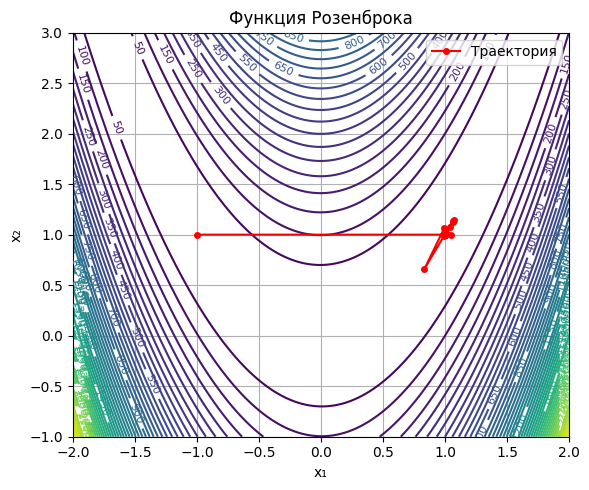

39.33821774158744
1.9496861032648274
1.9188054685932303
2.4381975952591075
2.443242317632654
2.104239257326094
5.071696162470252
6.287510488093068
3.29105387085958
3.2945575717047078
3.1778655223568477
3.199810026724036


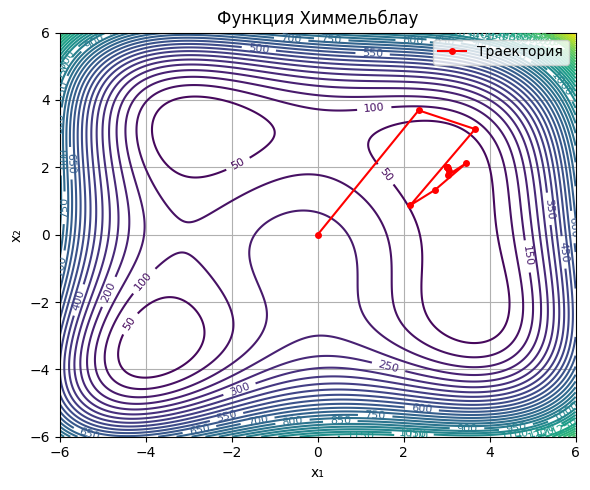

4.038006298684535
3.528582811924314
2.951413457704012
2.167697958134733
2.1743771066693958
2.345288147977297
2.3575115791246115


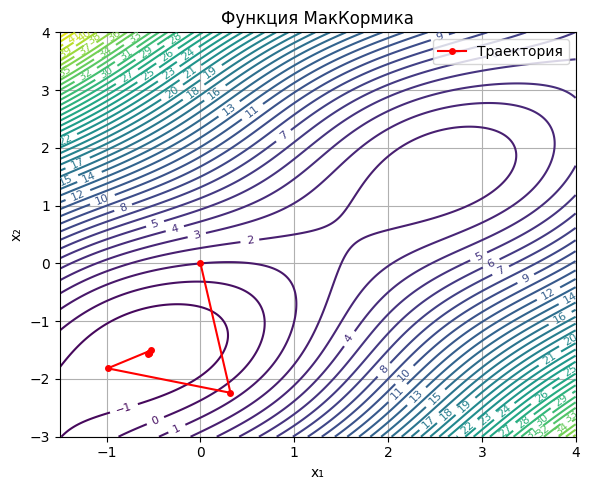

In [7]:
plot_function_and_trajectory(f_rosenbrock, grad_rosenbrock, np.array([-1.0, 1.0]), [[-2, 2], [-1, 3]], "Функция Розенброка")
plot_function_and_trajectory(f_himmelblau, grad_himmelblau, np.array([0.0, 0.0]), [[-6, 6], [-6, 6]], "Функция Химмельблау")
plot_function_and_trajectory(f_mccormick, grad_mccormick, np.array([0.0, 0.0]), [[-1.5, 4], [-3, 4]], "Функция МакКормика")

Создание анимации траекторий движения к минимуму

In [8]:
# def create_animation(f, grad_f, x0, bounds, title, filename):
#     _, traj, _ = dfp(f, grad_f, x0)
#     traj = np.array(traj)

#     x = np.linspace(bounds[0][0], bounds[0][1], 400)
#     y = np.linspace(bounds[1][0], bounds[1][1], 400)
#     X, Y = np.meshgrid(x, y)
#     Z = np.array([f([x, y]) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

#     fig, ax = plt.subplots(figsize=(6, 5))
#     cp = ax.contour(X, Y, Z, levels=50, cmap='viridis')
#     ax.clabel(cp, inline=True, fontsize=8)
#     line, = ax.plot([], [], 'ro-', markersize=4)
#     ax.set_title(title)
#     ax.set_xlim(bounds[0])
#     ax.set_ylim(bounds[1])
#     ax.set_xlabel('x₁')
#     ax.set_ylabel('x₂')

#     def init():
#         line.set_data([], [])
#         return line,

#     def update(frame):
#         line.set_data(traj[:frame+1, 0], traj[:frame+1, 1])
#         return line,

#     ani = animation.FuncAnimation(fig, update, frames=len(traj), init_func=init,
#                                   blit=True, repeat=False)

#     gif_path = f"{filename}.gif"
#     ani.save(gif_path, writer='pillow', fps=5)
#     plt.close(fig)
#     return gif_path

# # Создаём гифки
# gif_rosenbrock = create_animation(f_rosenbrock, grad_rosenbrock, np.array([-1.0, 1.0]), [[-2, 2], [-1, 3]], "Розенброк", "dfp_rosenbrock")
# gif_himmelblau = create_animation(f_himmelblau, grad_himmelblau, np.array([0.0, 0.0]), [[-6, 6], [-6, 6]], "Химмельблау", "dfp_himmelblau")
# gif_mccormick = create_animation(f_mccormick, grad_mccormick, np.array([0.0, 0.0]), [[-1.5, 4], [-3, 4]], "МакКормик", "dfp_mccormick")

### Метод BFGS

In [9]:
def bfgs(f, grad_f, x0, eps=1e-5, max_iter=1000):
    iters = 0
    x = x0.copy()
    n = len(x)
    H = np.eye(n)
    trajectory = [x.copy()]

    for _ in range(max_iter):
        g = grad_f(x)
        if np.linalg.norm(g) < eps:  # Проверка на сходимость (градиент близок к нулю)
            break
        p = -H @ g
        alpha = line_search(f, grad_f, x, p)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - g

        # Проверка условия на положительную определенность
        if np.dot(y, s) > 1e-10:
            rho = 1.0 / np.dot(y, s)
            I = np.eye(n)
            H = (I - rho * np.outer(s, y)) @ H @ (I - rho * np.outer(y, s)) + rho * np.outer(s, s)
        else:
            # Пропуск обновления матрицы, если y^T s слишком мало
            print(f"Пропущено обновление на итерации {iters}: y^T s = {np.dot(y, s)}")

        x = x_new
        trajectory.append(x.copy())
        iters += 1

    return x, np.array(trajectory), iters

In [10]:
for title, f, grad_f, x0 in fs:
    x_min, _, iters = bfgs(f, grad_f, x0)
    print(f"Минимум функции {title}: {x_min}, f(x) = {f(x_min)}")

Минимум функции Розенброка: [1.00000055 1.00000112], f(x) = 3.5487168843908395e-13
Минимум функции Химмельбау: [3. 2.], f(x) = 3.1795813406883616e-16
Минимум функции МакКормика: [-0.54719771 -1.54719775], f(x) = -1.913222954980979


In [11]:
for title, f, grad_f, x0 in fs:
    print(f"Функция {title}:")
    for eps in ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5']:
        x_min, _, iters = bfgs(f, grad_f, x0, eps=float(eps))
        print(f"Точность: {eps}, количество итераций: {iters}")

Функция Розенброка:
Точность: 1e-1, количество итераций: 8
Точность: 1e-2, количество итераций: 10
Точность: 1e-3, количество итераций: 11
Точность: 1e-4, количество итераций: 12
Точность: 1e-5, количество итераций: 12
Функция Химмельбау:
Точность: 1e-1, количество итераций: 11
Точность: 1e-2, количество итераций: 12
Точность: 1e-3, количество итераций: 14
Точность: 1e-4, количество итераций: 14
Точность: 1e-5, количество итераций: 14
Функция МакКормика:
Точность: 1e-1, количество итераций: 3
Точность: 1e-2, количество итераций: 5
Точность: 1e-3, количество итераций: 6
Точность: 1e-4, количество итераций: 7
Точность: 1e-5, количество итераций: 8


26.680552572847176
1027.4171917782264
563.9284629169377
635.6994677486163
364.5017421270261
4575.051986888513
14993.40236754067
16664.86269192736
7100.197957649364
11992.903753790824
14305.873208361378
10556.050207985192
1918.5390216071478
865.2216393888426
2015.7899481937297
3807.3336709863015
3676.128567918338
2512.6304320034064
2146.2393365392477
2489.8693972791634


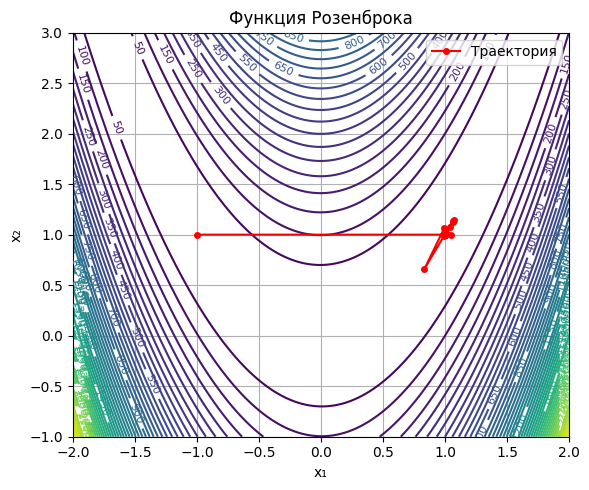

39.33821774158744
1.9496861032648274
1.9188054685932303
2.4381975952591075
2.443242317632654
2.104239257326094
5.071696162470252
6.287510488093068
3.29105387085958
3.2945575717047078
3.1778655223568477
3.199810026724036


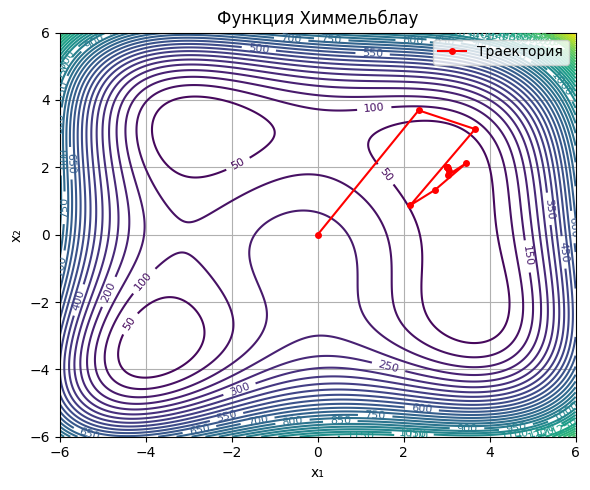

4.038006298684535
3.528582811924314
2.951413457704012
2.167697958134733
2.1743771066693958
2.345288147977297
2.3575115791246115


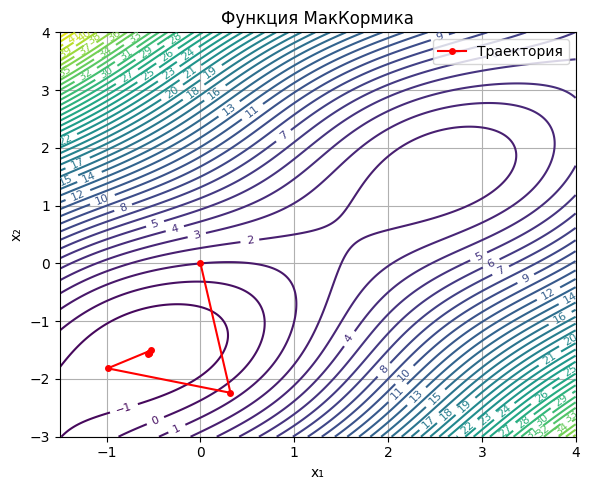

In [12]:
plot_function_and_trajectory(f_rosenbrock, grad_rosenbrock, np.array([-1.0, 1.0]), [[-2, 2], [-1, 3]], "Функция Розенброка")
plot_function_and_trajectory(f_himmelblau, grad_himmelblau, np.array([0.0, 0.0]), [[-6, 6], [-6, 6]], "Функция Химмельблау")
plot_function_and_trajectory(f_mccormick, grad_mccormick, np.array([0.0, 0.0]), [[-1.5, 4], [-3, 4]], "Функция МакКормика")

In [13]:
# def create_animation(f, grad_f, x0, bounds, title, filename):
#     _, traj, _ = bfgs(f, grad_f, x0)
#     traj = np.array(traj)

#     x = np.linspace(bounds[0][0], bounds[0][1], 400)
#     y = np.linspace(bounds[1][0], bounds[1][1], 400)
#     X, Y = np.meshgrid(x, y)
#     Z = np.array([f([x, y]) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

#     fig, ax = plt.subplots(figsize=(6, 5))
#     cp = ax.contour(X, Y, Z, levels=50, cmap='viridis')
#     ax.clabel(cp, inline=True, fontsize=8)
#     line, = ax.plot([], [], 'ro-', markersize=4)
#     ax.set_title(title)
#     ax.set_xlim(bounds[0])
#     ax.set_ylim(bounds[1])
#     ax.set_xlabel('x₁')
#     ax.set_ylabel('x₂')

#     def init():
#         line.set_data([], [])
#         return line,

#     def update(frame):
#         line.set_data(traj[:frame+1, 0], traj[:frame+1, 1])
#         return line,

#     ani = animation.FuncAnimation(fig, update, frames=len(traj), init_func=init,
#                                   blit=True, repeat=False)

#     gif_path = f"{filename}.gif"
#     ani.save(gif_path, writer='pillow', fps=5)
#     plt.close(fig)
#     return gif_path

# # Создаём гифки
# gif_rosenbrock = create_animation(f_rosenbrock, grad_rosenbrock, np.array([-1.0, 1.0]), [[-2, 2], [-1, 3]], "Розенброк", "bfgs_rosenbrock")
# gif_himmelblau = create_animation(f_himmelblau, grad_himmelblau, np.array([0.0, 0.0]), [[-6, 6], [-6, 6]], "Химмельблау", "bfgs_himmelblau")
# gif_mccormick = create_animation(f_mccormick, grad_mccormick, np.array([0.0, 0.0]), [[-1.5, 4], [-3, 4]], "МакКормик", "bfgs_mccormick")